In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/churn/churn.csv


In [2]:
#import the dataset
df=pd.read_csv("/kaggle/input/churn/churn.csv")

In [3]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [4]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [5]:
df.isna().any()

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [7]:
df.state.nunique()

51

In [8]:
import re
df['area_code']=df.area_code.str.extract('(\d+)')
df.area_code.astype(str).astype(int)

0       415
1       415
2       415
3       408
4       415
       ... 
4995    408
4996    415
4997    415
4998    510
4999    415
Name: area_code, Length: 5000, dtype: int64

In [9]:
df['area_code']=df.area_code.astype(str).astype(int)

In [10]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [11]:
import seaborn as sns

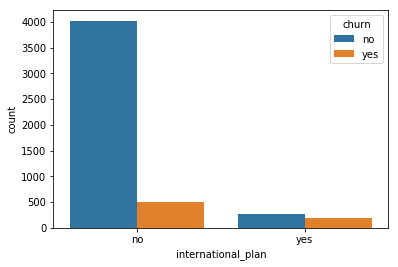

In [12]:
sns.countplot(x='international_plan',data=df,hue='churn')

In [13]:
pd.crosstab(df.international_plan,df.churn,normalize='index').round(4)*100

churn,no,yes
international_plan,,
no,88.78,11.22
yes,57.93,42.07


In [14]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df['state']=lb_make.fit_transform(df['state'])
df['international_plan']=lb_make.fit_transform(df['international_plan'])
df['voice_mail_plan']=lb_make.fit_transform(df['voice_mail_plan'])
df['churn']=lb_make.fit_transform(df['churn'])



In [15]:
col=list(df.columns)
predictors=col[:-1]
result=col[-1]

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [17]:
d=sc.fit_transform(df[predictors])
new_df=pd.DataFrame(d)

In [18]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.675476,0.698941,-0.519166,-0.323240,1.667120,1.273145,1.573802,0.502824,1.574074,-0.064032,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.094809,-0.584236,-0.095509,-0.436676
1,0.608134,0.169849,-0.519166,-0.323240,1.667120,1.346973,-0.346802,1.158422,-0.347082,-0.101621,0.141693,-0.101089,1.068992,0.154374,1.069818,1.245227,-0.584236,1.245982,-0.436676
2,0.337900,0.925695,-0.519166,-0.323240,-0.599837,-0.572549,1.171125,0.704546,1.171286,-1.571562,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0.701969,0.229917,0.695971,-1.202236
3,0.608134,-0.409634,-0.685024,3.093675,-0.599837,-0.572549,2.210292,-1.463971,2.210457,-2.744745,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,-1.326194,1.044069,-1.329681,0.328885
4,0.675692,-0.636388,-0.519166,3.093675,-0.599837,-0.572549,-0.252163,0.654116,-0.252115,-1.035419,1.100103,-1.034426,-0.267041,1.056327,-0.267307,-0.058592,-0.584236,-0.055264,1.094445


In [19]:
#import package for PCA
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit_transform(new_df)

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(pc,df[result])

In [21]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model1=lg.fit(xtrain,ytrain)
pred1=model1.predict(xtest)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
print(f1_score(ytest,pred1))
print(precision_score(ytest,pred1))
print(recall_score(ytest,pred1))
print(confusion_matrix(ytest,pred1))
print(np.mean(ytest==pred1))

0.27947598253275113
0.5079365079365079
0.1927710843373494
[[1053   31]
 [ 134   32]]
0.868


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model2=knn.fit(xtrain,ytrain)
pred2=model2.predict(xtest)

In [24]:
print(f1_score(ytest,pred2))
print(precision_score(ytest,pred2))
print(recall_score(ytest,pred2))
print(confusion_matrix(ytest,pred2))
print(np.mean(ytest==pred2))

0.4396551724137931
0.7727272727272727
0.3072289156626506
[[1069   15]
 [ 115   51]]
0.896


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model3=rf.fit(xtrain,ytrain)
pred3=model3.predict(xtest)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
print(f1_score(ytest,pred3))
print(precision_score(ytest,pred3))
print(recall_score(ytest,pred3))
print(confusion_matrix(ytest,pred3))
print(np.mean(ytest==pred3))

0.4166666666666667
0.6756756756756757
0.30120481927710846
[[1060   24]
 [ 116   50]]
0.888
